###Imports


In [23]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import os
from functools import reduce


Read Csv File


In [24]:
data = pd.read_csv("players.csv")


Map reduce to calculate the highest player killing
first we group by PlayerName and number of kills and map ea

In [25]:
import pandas as pd
from functools import reduce

# Step 1: Read CSV and Group by GameID, PlayerName, and Kills

grouped_data = data.groupby(['GameID', 'Agent', 'Kills'])

# Step 2: Sort by Agent
sorted_data = grouped_data.apply(lambda x: x.sort_values('Agent'))
# Step 3: Reset index
sorted_data = sorted_data.reset_index(drop=True)
selected_columns = sorted_data[['GameID', 'Agent', 'Kills']]
sorted_data_by_agent = selected_columns.sort_values(by='Agent')
print(sorted_data_by_agent)

agent_kills = sorted_data.groupby('Agent')['Kills'].sum()

agent_highest_kills = agent_kills.idxmax()

print("Total kills for each agent:")
print(agent_kills)

print("\nAgent with the highest kills:", agent_highest_kills)
print("Total kills for the highest agent:", agent_kills[agent_highest_kills])




     GameID  Agent  Kills
0     58578  astra     17
911   60913  astra     14
910   60913  astra      5
310   60685  astra     17
311   60685  astra     19
..      ...    ...    ...
329   60686  viper     18
819   60895  viper     14
338   60687  viper      4
579   60790  viper      9
758   60885  viper      2

[1000 rows x 3 columns]
Total kills for each agent:
Agent
astra        1657
breach        356
brimstone      26
chamber       678
cypher        546
jett         2548
kayo          387
killjoy      1140
omen           14
raze          520
reyna         637
sage          502
skye         1220
sova         2142
viper        1457
Name: Kills, dtype: int64

Agent with the highest kills: jett
Total kills for the highest agent: 2548


/var/folders/ct/rdr6jx_j6jjcx1zm07rqglw00000gn/T/ipykernel_4795/1520087263.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_data = grouped_data.apply(lambda x: x.sort_values('Agent'))


In [26]:
from functools import reduce

def mapper(row):
    return (row['Agent'], row['Kills'])

mapped_data = map(mapper, sorted_data.to_dict(orient='records'))

def reducer(accumulator, item):
    agent, kills = item
    accumulator[agent] = accumulator.get(agent, 0) + kills
    return accumulator

agent_kills = reduce(reducer, mapped_data, {})

agent_highest_kills = max(agent_kills, key=agent_kills.get)

print("Total kills for each agent:")
for agent, kills in agent_kills.items():
    print(f"{agent}: {kills}")

print("\nAgent with the highest kills:", agent_highest_kills)
print("Total kills for the highest agent:", agent_kills[agent_highest_kills])


Total kills for each agent:
astra: 1657
breach: 356
jett: 2548
kayo: 387
killjoy: 1140
skye: 1220
sova: 2142
raze: 520
sage: 502
cypher: 546
viper: 1457
chamber: 678
reyna: 637
brimstone: 26
omen: 14

Agent with the highest kills: jett
Total kills for the highest agent: 2548


PLotting the result

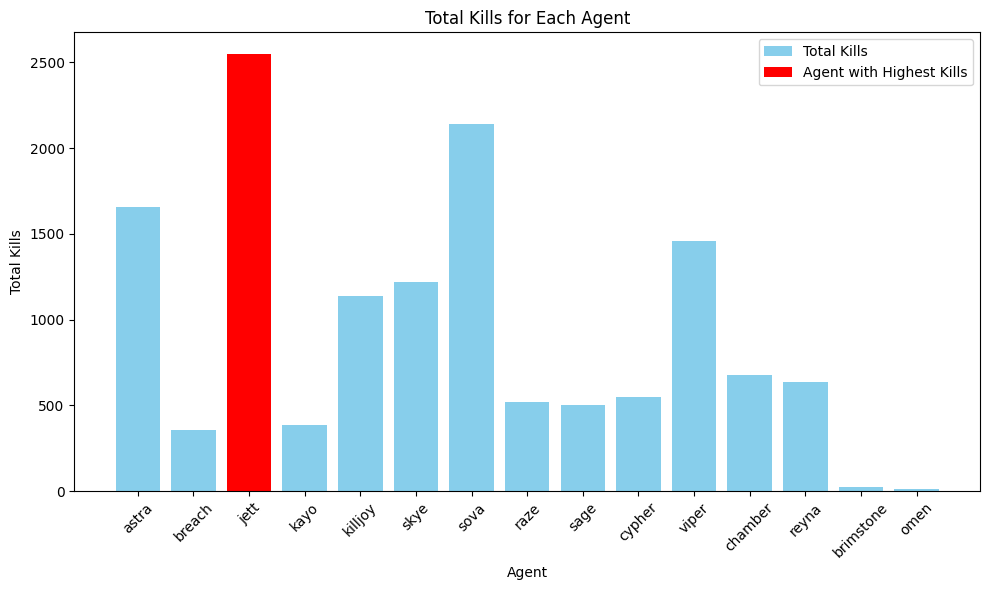

In [27]:

# Convert agent_kills dictionary to lists for plotting
agents = list(agent_kills.keys())
kills = list(agent_kills.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(agents, kills, color='skyblue')
plt.xlabel('Agent')
plt.ylabel('Total Kills')
plt.title('Total Kills for Each Agent')

# Highlight the agent with the highest kills
plt.bar(agent_highest_kills, agent_kills[agent_highest_kills], color='red')

# Adding legend
plt.legend(['Total Kills', 'Agent with Highest Kills'])

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


Heashot Percentage for each player

In [28]:
from functools import reduce

def mapper(row):
    player = row['PlayerName']
    kills = row['Kills']
    headshots = row['HS_Present']
    return (player, (kills, headshots))

mapped_data = map(mapper, sorted_data.to_dict(orient='records'))
def reducer(accumulator, item):
    player, (kills, headshots) = item
    accumulator[player] = accumulator.get(player, {'Kills': 0, 'HS_Present': 0, 'Count': 0})
    accumulator[player]['Kills'] += kills
    accumulator[player]['HS_Present'] += headshots
    accumulator[player]['Count'] += 1
    return accumulator

player_data = reduce(reducer, mapped_data, {})

for player, data in player_data.items():
    kills = data['Kills']
    headshots = data['HS_Present']
    count = data['Count']
    average_headshots = headshots / count if count > 0 else 0
    player_data[player]['Average_Headshots'] = average_headshots
sorted_player_data = sorted(player_data.items(), key=lambda x: x[1]['Average_Headshots'], reverse=True)

#  Print sorted results
for player, data in sorted_player_data:
    print(f"Player Name: {player}, Average Headshots: {data['Average_Headshots']:.2f}")



Player Name: saizen, Average Headshots: 0.55
Player Name: potatolover23573, Average Headshots: 0.53
Player Name: Kenny, Average Headshots: 0.50
Player Name: Bape, Average Headshots: 0.50
Player Name: Redneval, Average Headshots: 0.48
Player Name: Moechilla, Average Headshots: 0.45
Player Name: Unnlucky, Average Headshots: 0.42
Player Name: Pingfu, Average Headshots: 0.42
Player Name: theDoctorr, Average Headshots: 0.42
Player Name: Paincakes, Average Headshots: 0.41
Player Name: Boltzy, Average Headshots: 0.41
Player Name: Jangler, Average Headshots: 0.41
Player Name: fl1pzjder, Average Headshots: 0.40
Player Name: pureVNS, Average Headshots: 0.39
Player Name: Joeyy, Average Headshots: 0.39
Player Name: Gonchz, Average Headshots: 0.39
Player Name: Azuura, Average Headshots: 0.38
Player Name: Suka, Average Headshots: 0.38
Player Name: royal, Average Headshots: 0.38
Player Name: Smokey, Average Headshots: 0.38
Player Name: Akashi, Average Headshots: 0.38
Player Name: Stealthy, Average He

Checking the correlation between the kills and the headshot percentage

In [29]:
# Step 6: Create a DataFrame from player_data
player_df = pd.DataFrame.from_dict(player_data, orient='index')

# Step 7: Check correlation between average headshot and number of kills
correlation = player_df['Average_Headshots'].corr(player_df['Kills'])

print(f"Correlation between average headshot and number of kills: {correlation:.2f}")


Correlation between average headshot and number of kills: 0.01


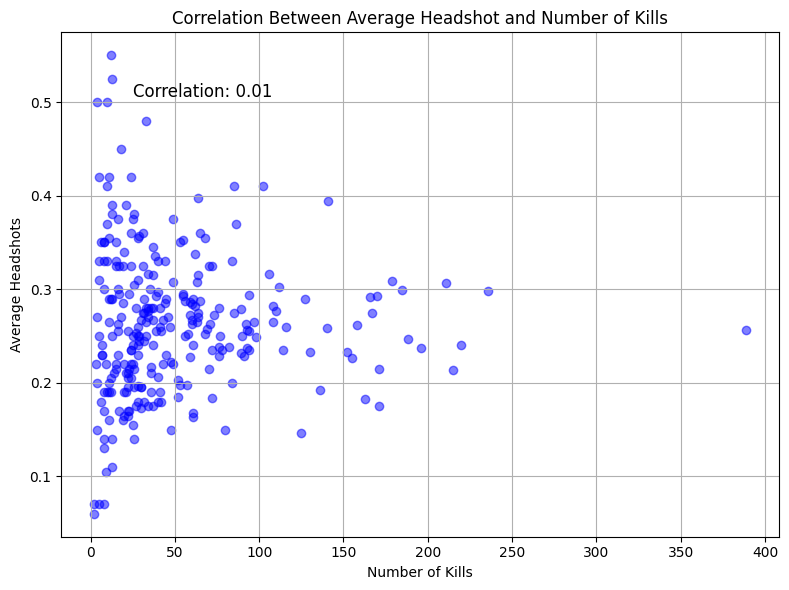

In [30]:
import matplotlib.pyplot as plt

# Step 6: Create a DataFrame from player_data
player_df = pd.DataFrame.from_dict(player_data, orient='index')

# Step 7: Plot correlation between average headshot and number of kills
plt.figure(figsize=(8, 6))
plt.scatter(player_df['Kills'], player_df['Average_Headshots'], color='blue', alpha=0.5)
plt.title('Correlation Between Average Headshot and Number of Kills')
plt.xlabel('Number of Kills')
plt.ylabel('Average Headshots')
plt.grid(True)
plt.tight_layout()

# Calculate correlation coefficient
correlation = player_df['Kills'].corr(player_df['Average_Headshots'])

# Adding correlation value to the plot
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show plot
plt.show()
